# IDP Boot Camp – Week 3 Assignment – Table Extraction

## Table detection

In [56]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [57]:
#path of folder
path='/content/drive/MyDrive/idp_bootcamp/week_3_assignment'

In [58]:
#install the libraries
%pip install transformers
%pip install pillow huggingface_hub
%pip install timm
%pip install matplotlib

In [59]:
#import libraries
from huggingface_hub import hf_hub_download
from transformers import AutoImageProcessor, TableTransformerForObjectDetection
import torch
from PIL import Image



In [60]:
import os
# Set the file path to the folder containing the images
file_path = '/content/drive/MyDrive/idp_bootcamp/week_3_assignment/assingment_data'

# List all files in the directory
image_names = os.listdir(file_path)

In [61]:
#get full image path overall images
image_paths=[]
for i in image_names:
  image_paths.append(file_path+"/"+i)


In [62]:
image_paths

['/content/drive/MyDrive/idp_bootcamp/week_3_assignment/assingment_data/0005ab896e95c5de6885bbf595500a8e-66.png',
 '/content/drive/MyDrive/idp_bootcamp/week_3_assignment/assingment_data/000f8315c3bea30fb7ae99f925286343-15.png',
 '/content/drive/MyDrive/idp_bootcamp/week_3_assignment/assingment_data/001e626d00966d0268d44ce686e8559b-118.png',
 '/content/drive/MyDrive/idp_bootcamp/week_3_assignment/assingment_data/001e626d00966d0268d44ce686e8559b-62.png',
 '/content/drive/MyDrive/idp_bootcamp/week_3_assignment/assingment_data/0081e7fd154bb0319f96ac0c6127da1a-118.png',
 '/content/drive/MyDrive/idp_bootcamp/week_3_assignment/assingment_data/005608f2ffa46e92e672f0083b6037c4-38.png',
 '/content/drive/MyDrive/idp_bootcamp/week_3_assignment/assingment_data/0079611b26cefff735f1d98a932e8b7d-1.png',
 '/content/drive/MyDrive/idp_bootcamp/week_3_assignment/assingment_data/004f4586092af34f31313224ab19c50c-4.png',
 '/content/drive/MyDrive/idp_bootcamp/week_3_assignment/assingment_data/00c0c202e8d3b133

['/content/drive/MyDrive/idp_bootcamp/week_3_assignment/assingment_data/0005ab896e95c5de6885bbf595500a8e-66.png',
 '/content/drive/MyDrive/idp_bootcamp/week_3_assignment/assingment_data/000f8315c3bea30fb7ae99f925286343-15.png',
 '/content/drive/MyDrive/idp_bootcamp/week_3_assignment/assingment_data/001e626d00966d0268d44ce686e8559b-118.png',
 '/content/drive/MyDrive/idp_bootcamp/week_3_assignment/assingment_data/001e626d00966d0268d44ce686e8559b-62.png',
 '/content/drive/MyDrive/idp_bootcamp/week_3_assignment/assingment_data/0081e7fd154bb0319f96ac0c6127da1a-118.png',
 '/content/drive/MyDrive/idp_bootcamp/week_3_assignment/assingment_data/005608f2ffa46e92e672f0083b6037c4-38.png',
 '/content/drive/MyDrive/idp_bootcamp/week_3_assignment/assingment_data/0079611b26cefff735f1d98a932e8b7d-1.png',
 '/content/drive/MyDrive/idp_bootcamp/week_3_assignment/assingment_data/004f4586092af34f31313224ab19c50c-4.png',
 '/content/drive/MyDrive/idp_bootcamp/week_3_assignment/assingment_data/00c0c202e8d3b133

In [63]:
#check the path is correct or not
file_path =image_paths[0]
image = Image.open(file_path).convert("RGB")

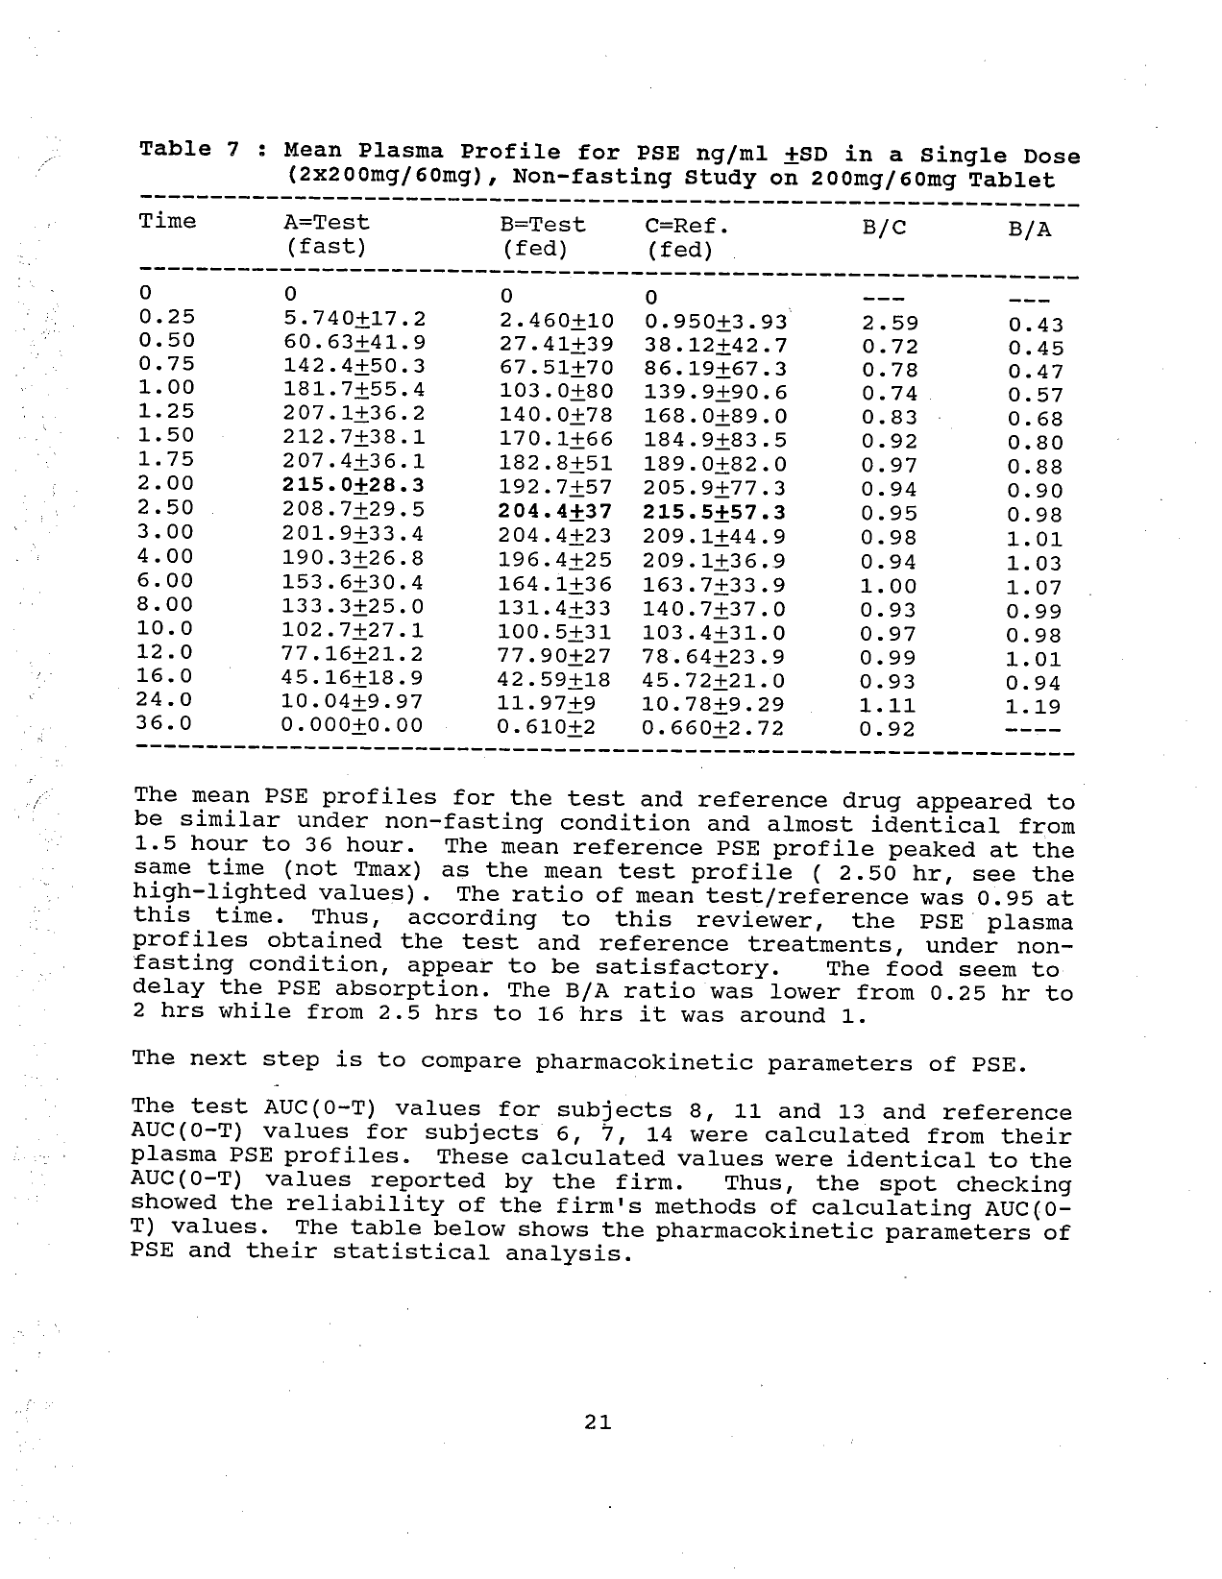

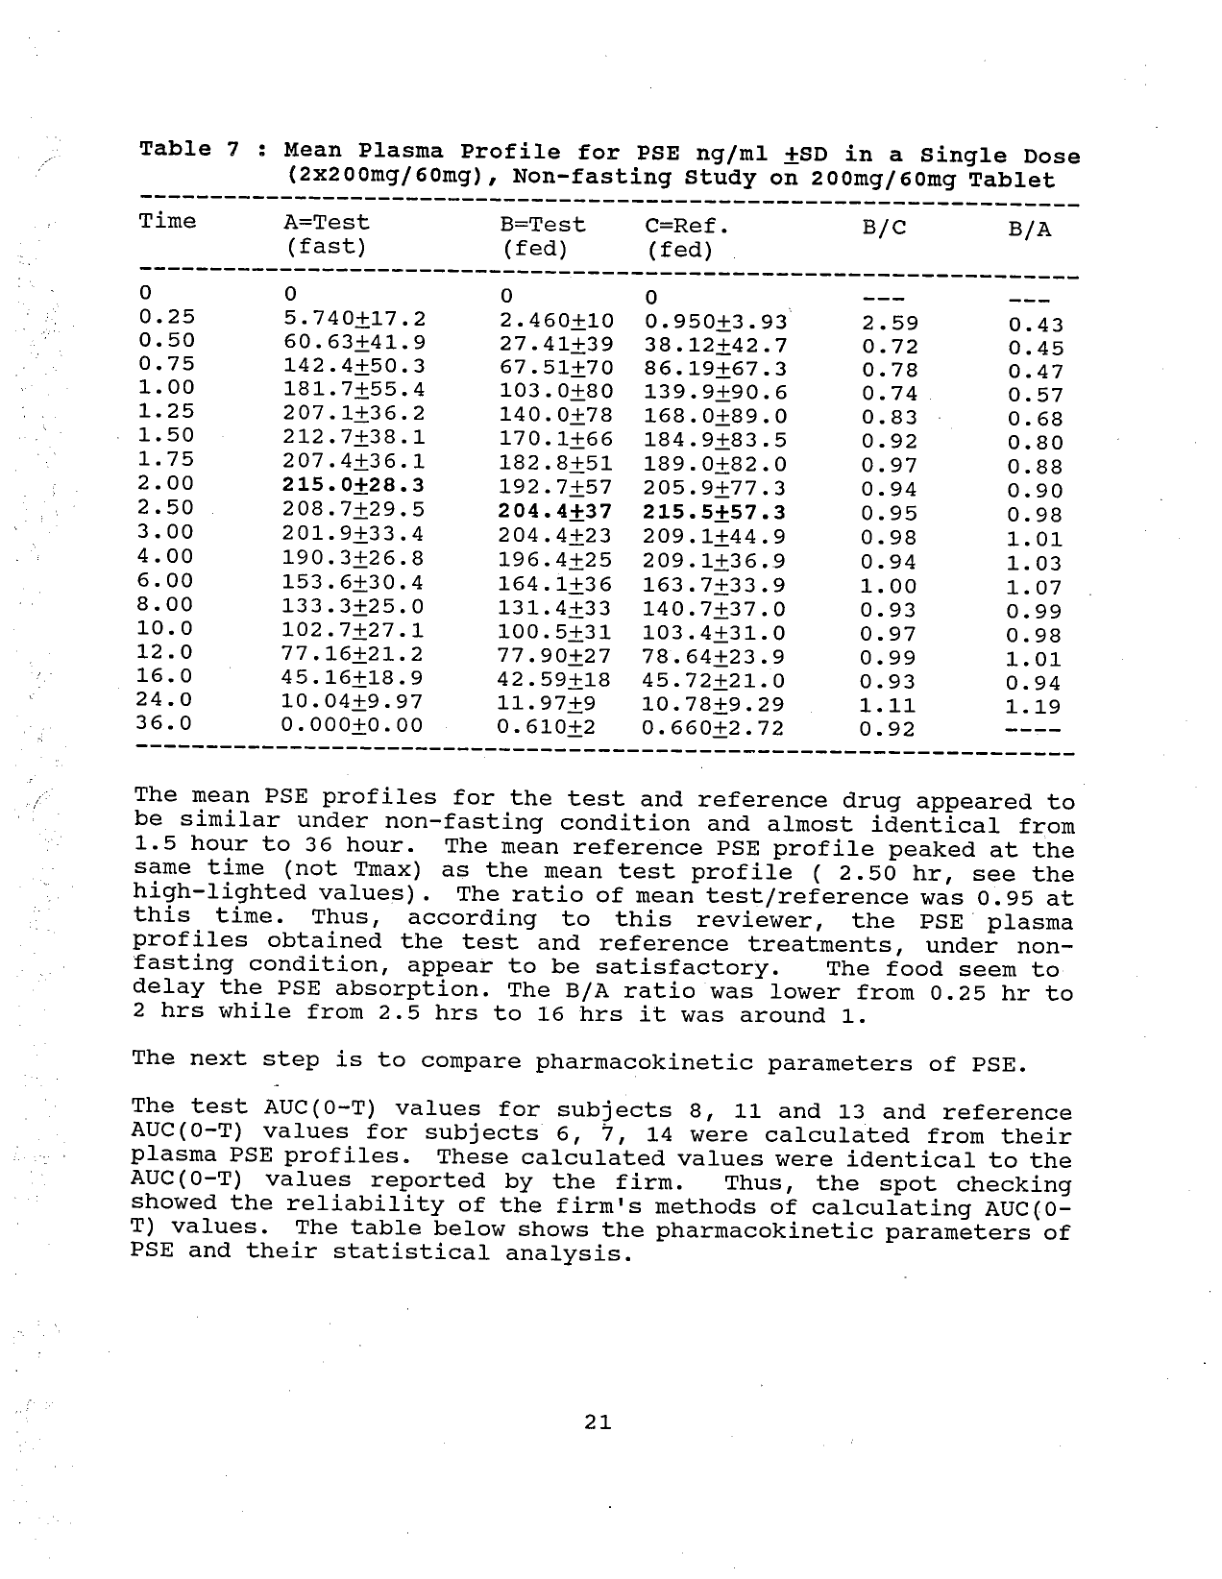

In [64]:
#call the image
image

In [65]:

#These lines load the pre-trained image processor and the Table Transformer model from Microsoft's Hugging Face repository for table detection
image_processor = AutoImageProcessor.from_pretrained("microsoft/table-transformer-detection")
model = TableTransformerForObjectDetection.from_pretrained("microsoft/table-transformer-detection")
total_outputs=[]
total_results=[]
total_box=[]
for i in image_paths:
  file_path =i
  image = Image.open(file_path).convert("RGB")
  inputs = image_processor(images=image, return_tensors="pt")
  outputs = model(**inputs)
  total_outputs.append(outputs)
  # convert outputs (bounding boxes and class logits) to Pascal VOC format (xmin, ymin, xmax, ymax)
  target_sizes = torch.tensor([image.size[::-1]])
  results = image_processor.post_process_object_detection(outputs, threshold=0.9, target_sizes=target_sizes)[0]
  total_results.append(results)
  for score, label, box in zip(results["scores"], results["labels"], results["boxes"]):
      box = [round(i, 2) for i in box.tolist()]
      print(
          f"Detected {model.config.id2label[label.item()]} with confidence "
          f"{round(score.item(), 3)} at location {box}"
      )
  total_box.append(box)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
The `max_size` parameter is deprecated and will be removed in v4.26. Please specify in `size['longest_edge'] instead`.
Some weights of the model checkpoint at microsoft/table-transformer-detection were not used when initializing TableTransformerForObjectDetection: ['model.backbone.conv_encoder.model.layer2.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer3.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer4.0.downsample.1.

Detected table with confidence 1.0 at location [139.92, 207.43, 1072.27, 739.92]
Detected table with confidence 1.0 at location [107.77, 1345.35, 992.21, 1504.46]
Detected table with confidence 0.961 at location [163.45, 379.17, 1071.13, 755.76]
Detected table with confidence 0.997 at location [226.83, 426.03, 880.58, 946.87]
Detected table with confidence 1.0 at location [184.53, 336.87, 968.37, 788.05]
Detected table with confidence 1.0 at location [130.82, 132.9, 911.65, 321.48]
Detected table with confidence 1.0 at location [179.47, 174.8, 1083.51, 924.94]
Detected table with confidence 1.0 at location [292.81, 935.59, 765.74, 990.56]


Some weights of the model checkpoint at microsoft/table-transformer-detection were not used when initializing TableTransformerForObjectDetection: ['model.backbone.conv_encoder.model.layer2.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer3.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer4.0.downsample.1.num_batches_tracked']
- This IS expected if you are initializing TableTransformerForObjectDetection from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TableTransformerForObjectDetection from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Detected table with confidence 1.0 at location [139.92, 207.43, 1072.27, 739.92]
Detected table with confidence 1.0 at location [107.77, 1345.35, 992.21, 1504.46]
Detected table with confidence 0.961 at location [163.45, 379.17, 1071.13, 755.76]
Detected table with confidence 0.997 at location [226.83, 426.03, 880.58, 946.87]
Detected table with confidence 1.0 at location [184.53, 336.87, 968.37, 788.05]
Detected table with confidence 1.0 at location [130.82, 132.9, 911.65, 321.48]
Detected table with confidence 1.0 at location [179.47, 174.8, 1083.51, 924.94]
Detected table with confidence 1.0 at location [292.81, 935.59, 765.74, 990.56]


In [66]:
#check the total result
total_results

[{'scores': tensor([0.9998], grad_fn=<IndexBackward0>),
  'labels': tensor([0]),
  'boxes': tensor([[ 139.9236,  207.4321, 1072.2660,  739.9159]],
         grad_fn=<IndexBackward0>)},
 {'scores': tensor([0.9998], grad_fn=<IndexBackward0>),
  'labels': tensor([0]),
  'boxes': tensor([[ 107.7661, 1345.3538,  992.2073, 1504.4553]],
         grad_fn=<IndexBackward0>)},
 {'scores': tensor([0.9606], grad_fn=<IndexBackward0>),
  'labels': tensor([0]),
  'boxes': tensor([[ 163.4466,  379.1742, 1071.1254,  755.7567]],
         grad_fn=<IndexBackward0>)},
 {'scores': tensor([0.9970], grad_fn=<IndexBackward0>),
  'labels': tensor([0]),
  'boxes': tensor([[226.8268, 426.0268, 880.5840, 946.8654]], grad_fn=<IndexBackward0>)},
 {'scores': tensor([0.9997], grad_fn=<IndexBackward0>),
  'labels': tensor([0]),
  'boxes': tensor([[184.5348, 336.8719, 968.3674, 788.0457]], grad_fn=<IndexBackward0>)},
 {'scores': tensor([0.9998], grad_fn=<IndexBackward0>),
  'labels': tensor([0]),
  'boxes': tensor([[130.8

[{'scores': tensor([0.9998], grad_fn=<IndexBackward0>),
  'labels': tensor([0]),
  'boxes': tensor([[ 139.9236,  207.4321, 1072.2660,  739.9159]],
         grad_fn=<IndexBackward0>)},
 {'scores': tensor([0.9998], grad_fn=<IndexBackward0>),
  'labels': tensor([0]),
  'boxes': tensor([[ 107.7661, 1345.3538,  992.2073, 1504.4553]],
         grad_fn=<IndexBackward0>)},
 {'scores': tensor([0.9606], grad_fn=<IndexBackward0>),
  'labels': tensor([0]),
  'boxes': tensor([[ 163.4466,  379.1742, 1071.1254,  755.7567]],
         grad_fn=<IndexBackward0>)},
 {'scores': tensor([0.9970], grad_fn=<IndexBackward0>),
  'labels': tensor([0]),
  'boxes': tensor([[226.8268, 426.0268, 880.5840, 946.8654]], grad_fn=<IndexBackward0>)},
 {'scores': tensor([0.9997], grad_fn=<IndexBackward0>),
  'labels': tensor([0]),
  'boxes': tensor([[184.5348, 336.8719, 968.3674, 788.0457]], grad_fn=<IndexBackward0>)},
 {'scores': tensor([0.9998], grad_fn=<IndexBackward0>),
  'labels': tensor([0]),
  'boxes': tensor([[130.8

In [67]:
total_results[0]["boxes"].tolist()

[[139.92356872558594,
  207.4320831298828,
  1072.2659912109375,
  739.9158935546875]]

[[139.92356872558594,
  207.4320831298828,
  1072.2659912109375,
  739.9158935546875]]

In [68]:
#visualize dected table
from PIL import ImageDraw

def visualize_bbox(image, box, color="red", width=2):
  """
  Visualizes a bounding box on a PIL image.

  Args:
    image: A PIL Image object.
    box: A list or tuple of four integers representing the bounding box
         coordinates (xmin, ymin, xmax, ymax).
    color: The color of the bounding box (default: red).
    width: The width of the bounding box lines (default: 2).
  """

  draw = ImageDraw.Draw(image)
  draw.rectangle(box, outline=color, width=width)
  return image


In [69]:
#check the image size
image.size

(1224, 1584)

(1224, 1584)

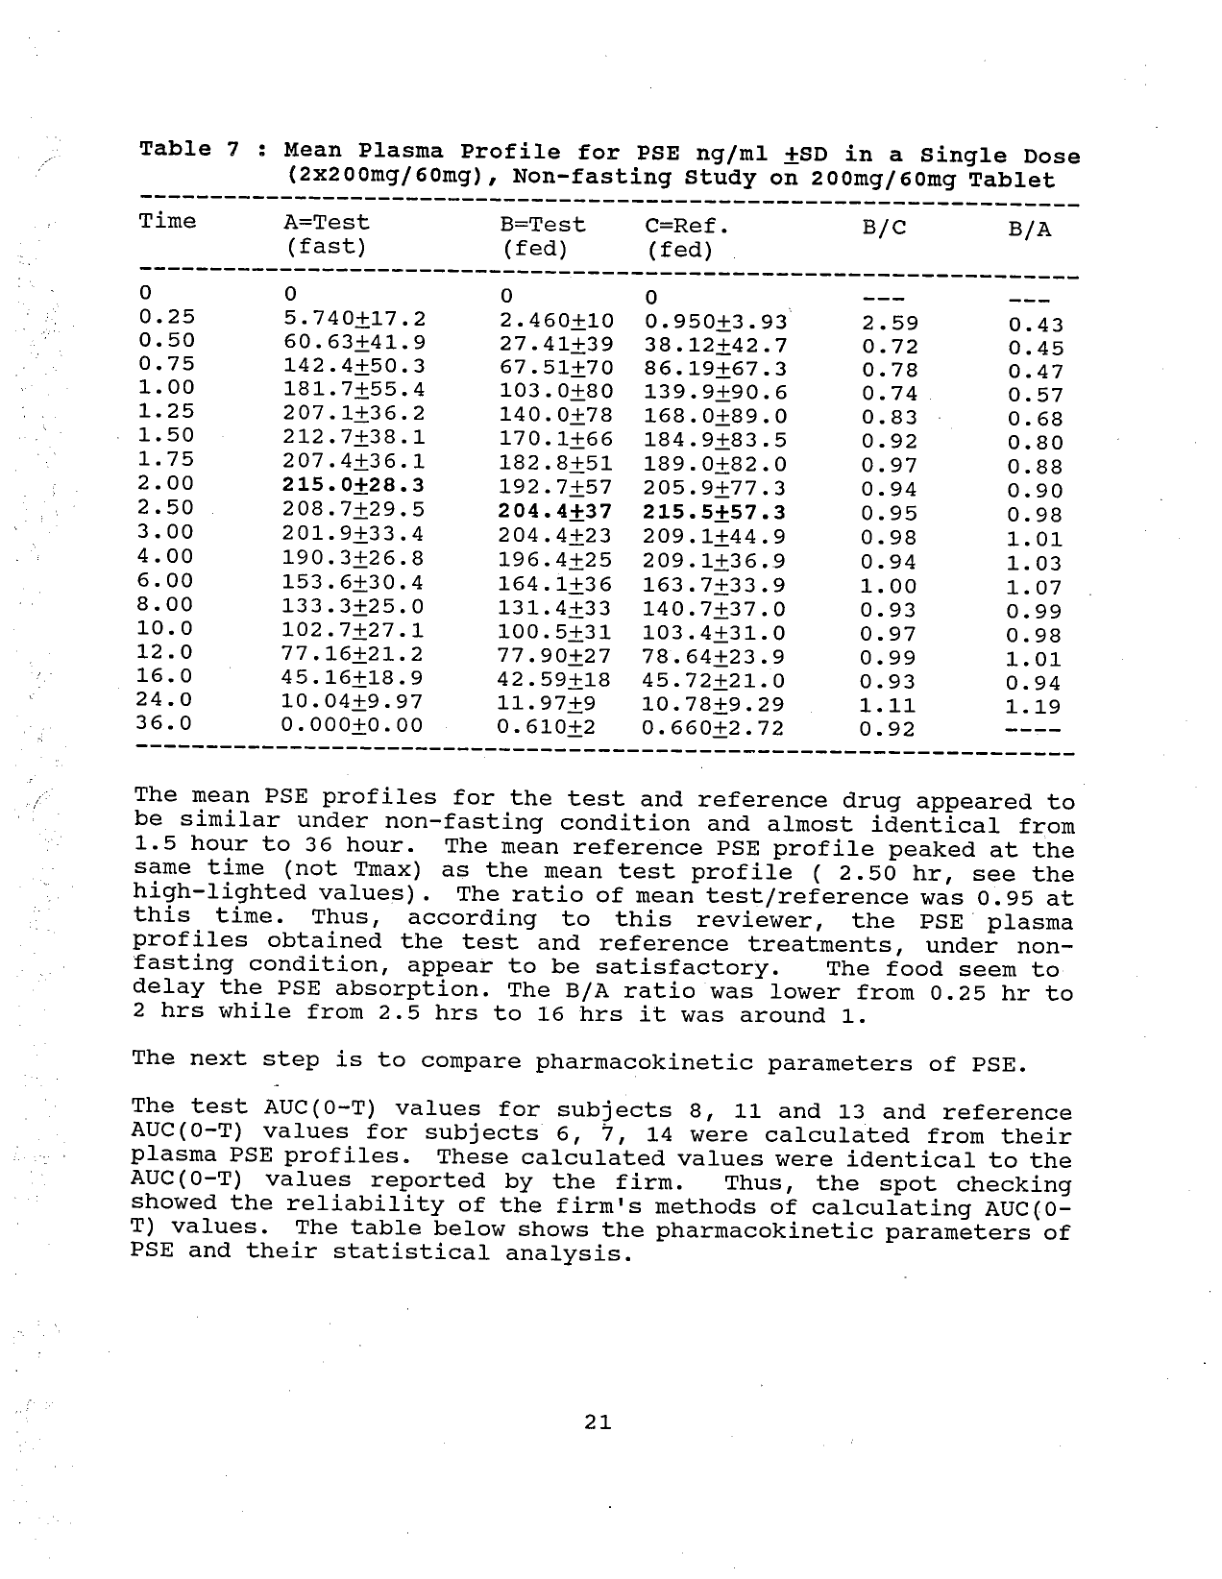

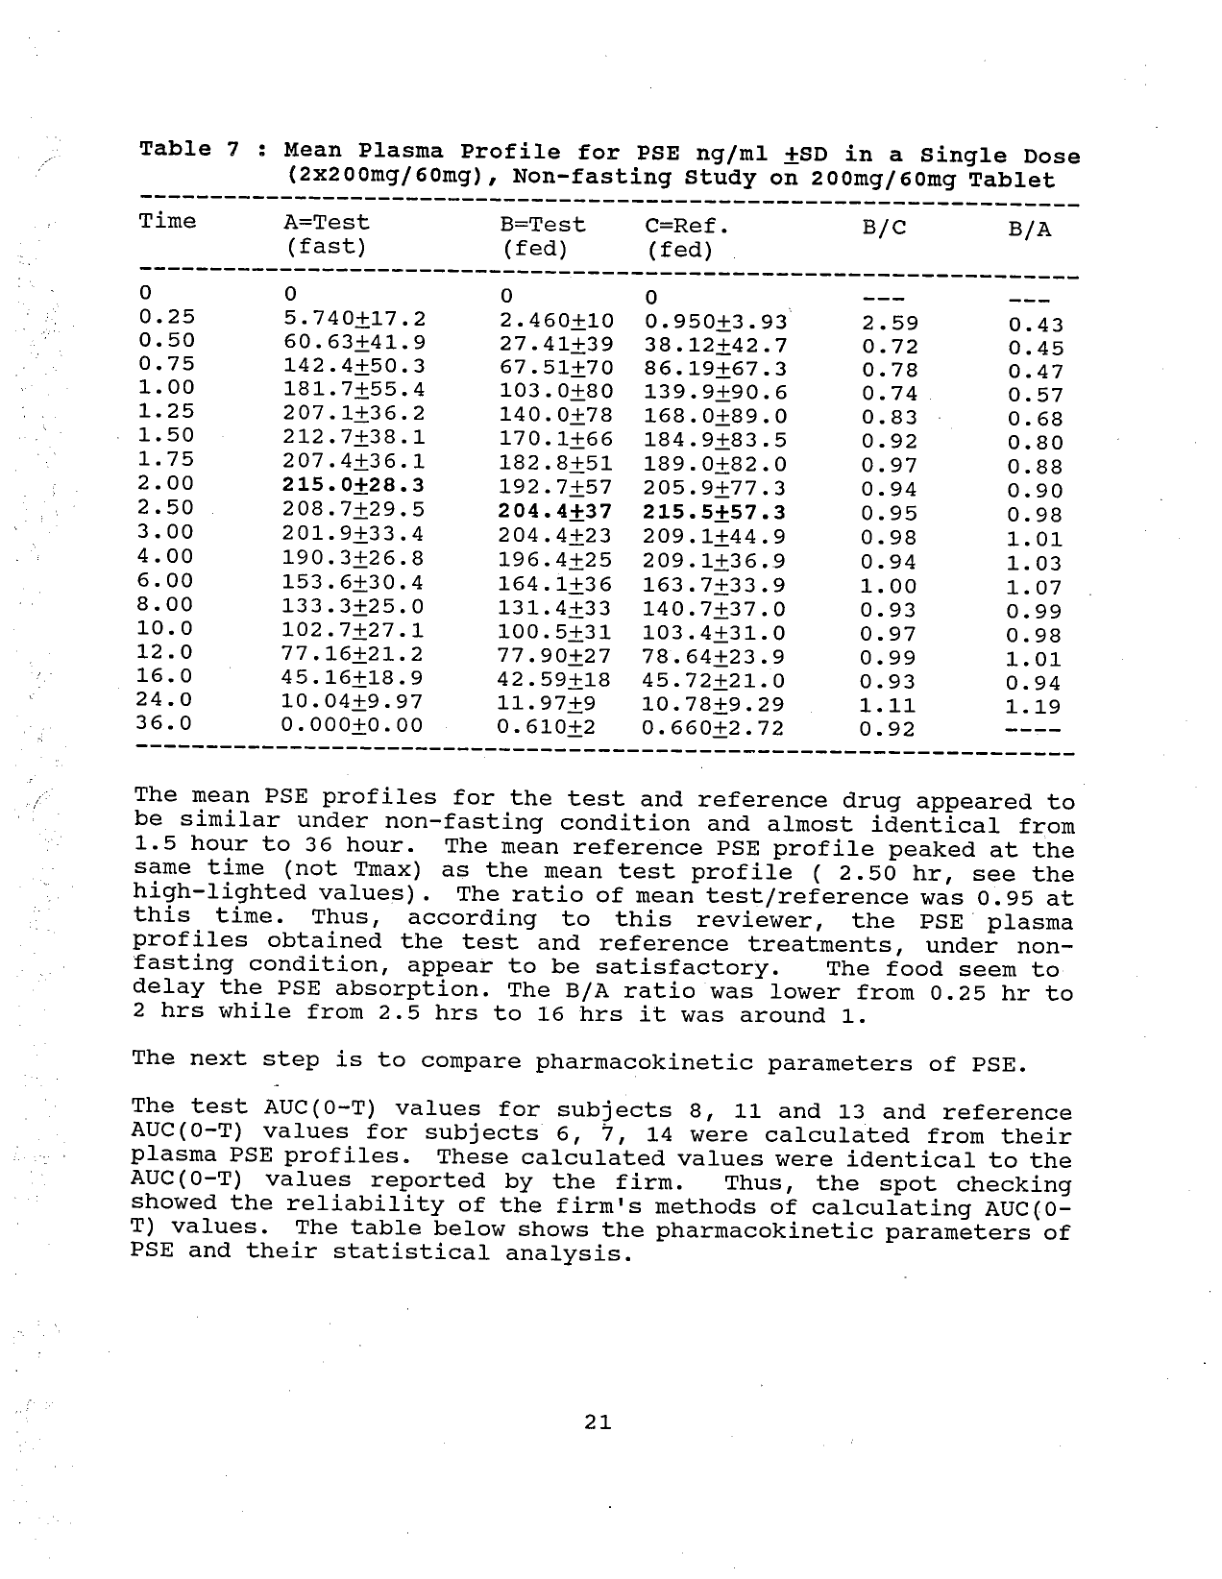

In [70]:
Image.open(image_paths[0]).convert("RGB")

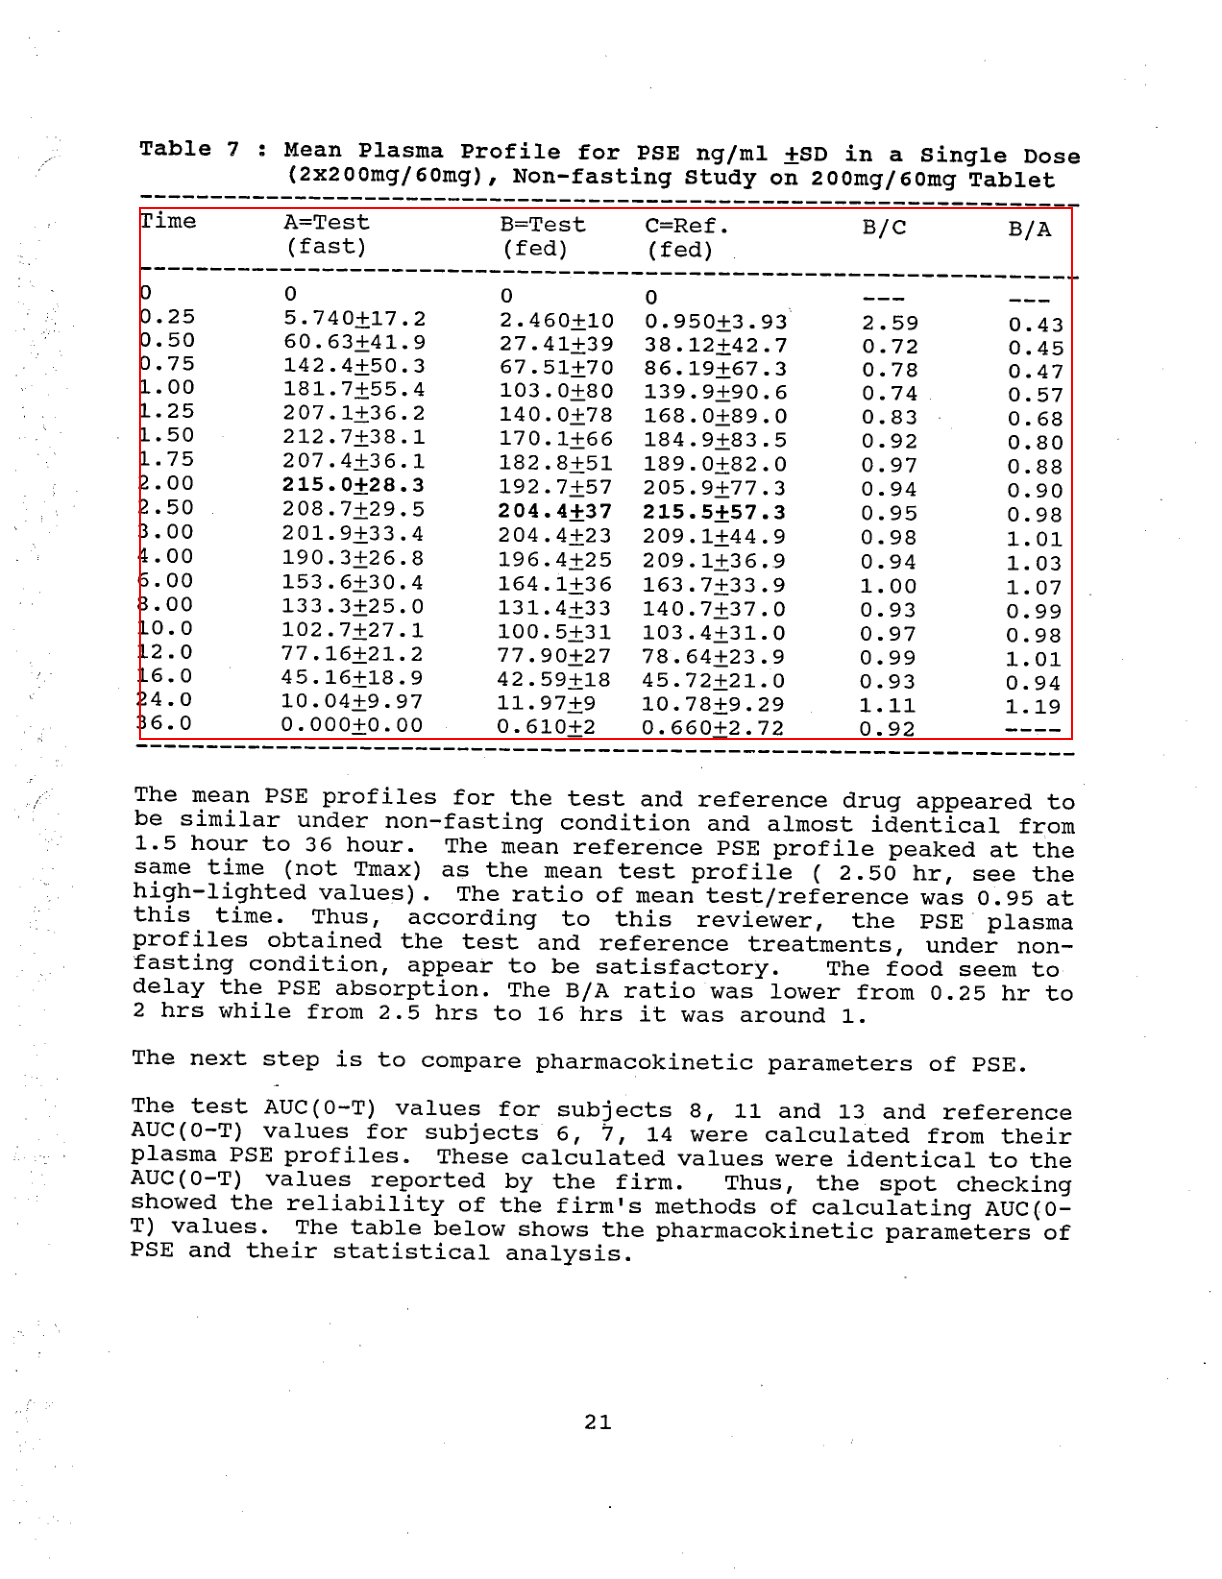

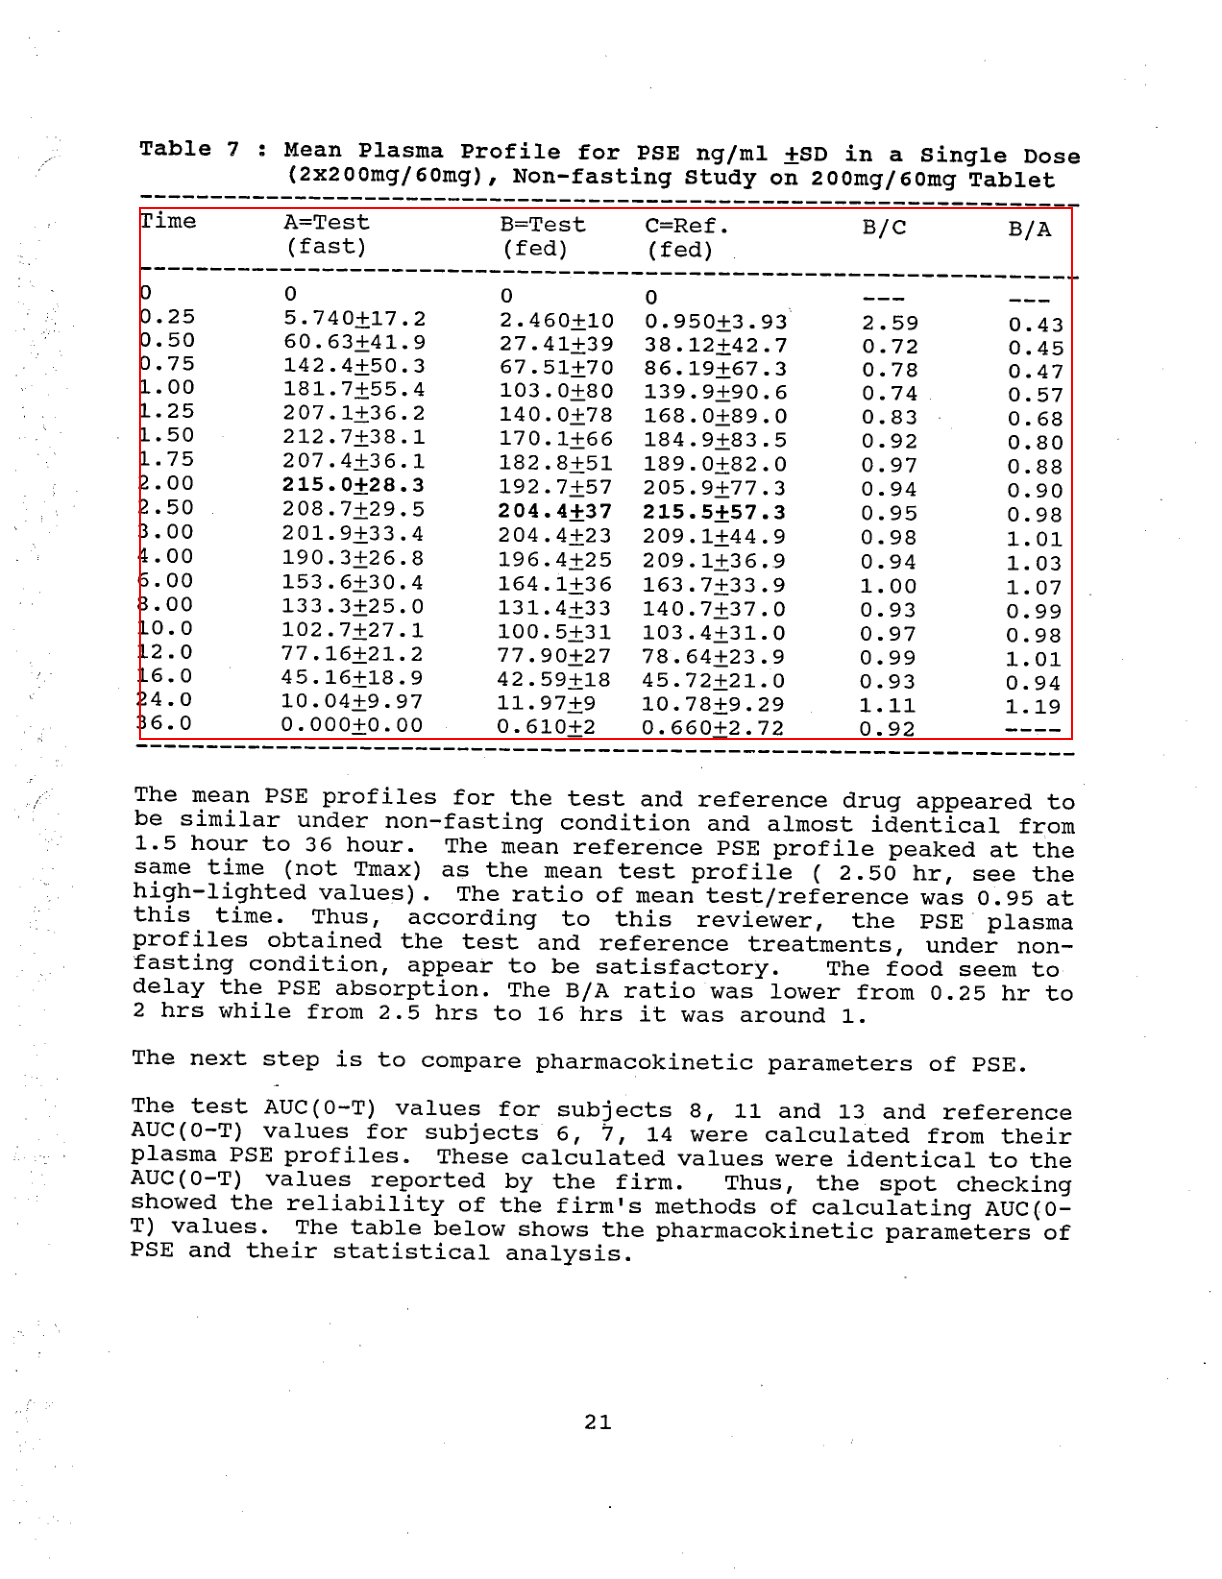

In [71]:
#check the output for single image
visualize_bbox(Image.open(image_paths[0]).convert("RGB"),total_results[0]["boxes"][0].tolist())

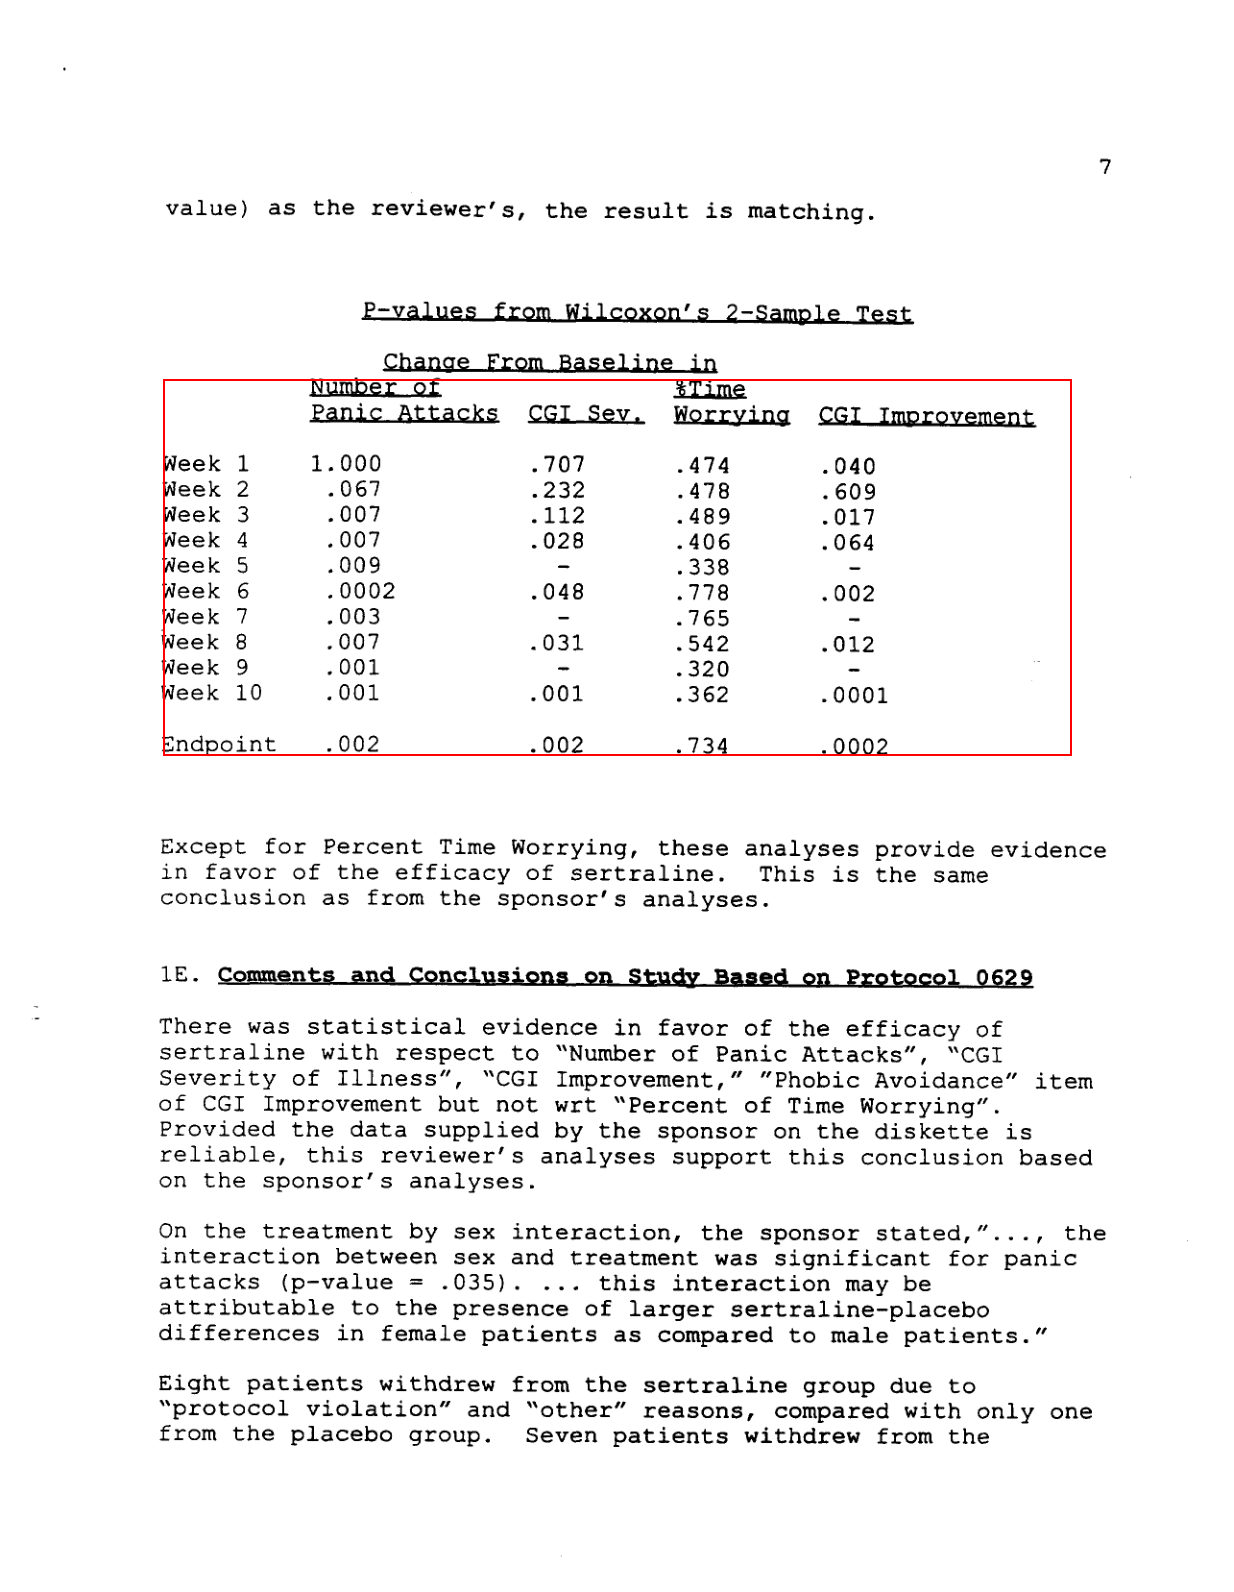

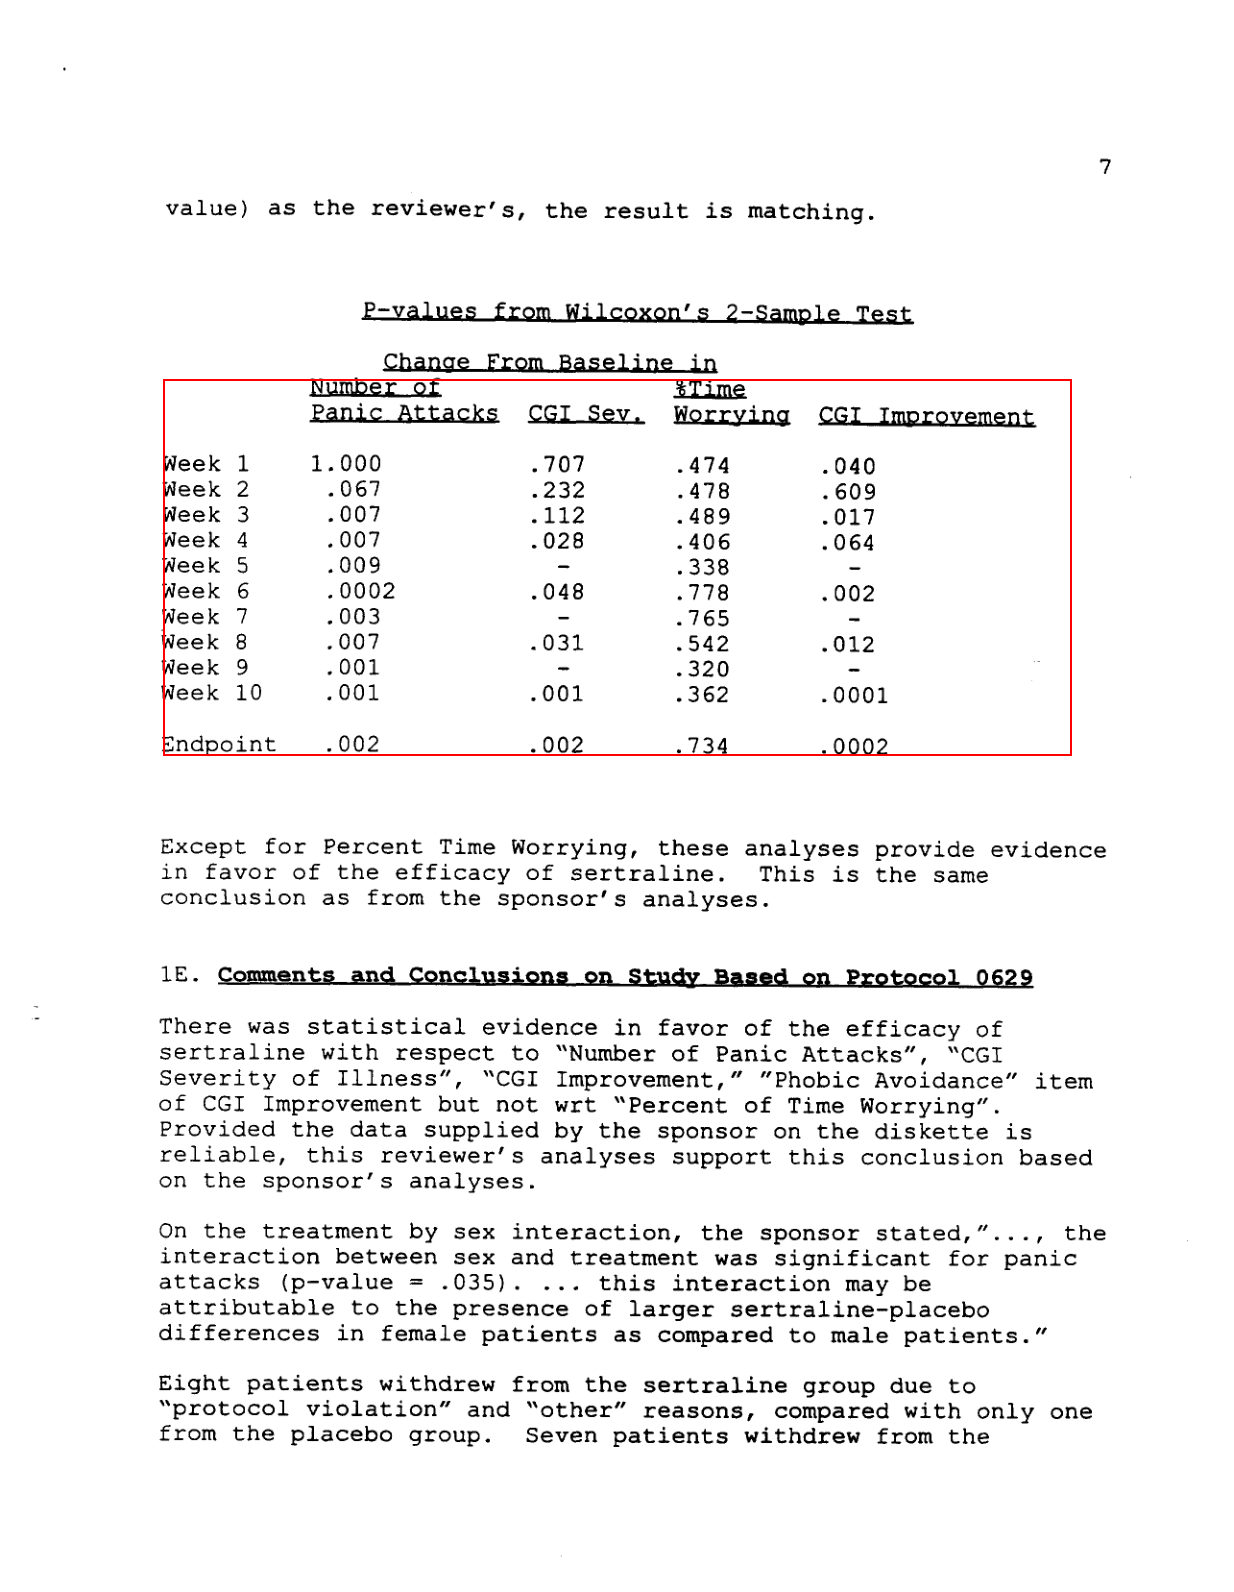

In [72]:
visualize_bbox(Image.open(image_paths[2]).convert("RGB"),total_results[2]["boxes"][0].tolist())

In [73]:
#check no of image
len(image_names)

10

10

In [74]:
#check no of results
len(total_results)

10

10

In [75]:
#try to save the table dected images in to Table detection_images
from PIL import Image

# Ensure `image_names` and `total_results` are defined properly
for i in range(len(image_names)):
    # Open the image and convert it to RGB
    image = Image.open(image_paths[i]).convert("RGB")

    # Check if there are bounding boxes detected
    if len(total_results[i]["boxes"]) > 0:  # Make sure there are boxes detected
        # Construct the save path for the modified image with bounding box
        eve_path = f'/content/drive/MyDrive/idp_bootcamp/week_3_assignment/Table detection_images/rec_{image_names[i]}'

        # Visualize the first bounding box
        image_with_bbox = visualize_bbox(image, total_results[i]["boxes"][0].tolist())
    else:
        print(f"No boxes detected for image: {image_names[i]}. Saving without bounding box.")

        # Save the original image if no boxes are found
        image_with_bbox = image
        eve_path = f'/content/drive/MyDrive/idp_bootcamp/week_3_assignment/Table detection_images/non_rec_{image_names[i]}'

    # Save the modified image with bounding boxes or the original image
    image_with_bbox.save(eve_path)

    print(f"Image saved to {eve_path}")


Image saved to /content/drive/MyDrive/idp_bootcamp/week_3_assignment/Table detection_images/rec_0005ab896e95c5de6885bbf595500a8e-66.png
Image saved to /content/drive/MyDrive/idp_bootcamp/week_3_assignment/Table detection_images/rec_000f8315c3bea30fb7ae99f925286343-15.png
Image saved to /content/drive/MyDrive/idp_bootcamp/week_3_assignment/Table detection_images/rec_001e626d00966d0268d44ce686e8559b-118.png
Image saved to /content/drive/MyDrive/idp_bootcamp/week_3_assignment/Table detection_images/rec_001e626d00966d0268d44ce686e8559b-62.png
Image saved to /content/drive/MyDrive/idp_bootcamp/week_3_assignment/Table detection_images/rec_0081e7fd154bb0319f96ac0c6127da1a-118.png
Image saved to /content/drive/MyDrive/idp_bootcamp/week_3_assignment/Table detection_images/rec_005608f2ffa46e92e672f0083b6037c4-38.png
No boxes detected for image: 0079611b26cefff735f1d98a932e8b7d-1.png. Saving without bounding box.
Image saved to /content/drive/MyDrive/idp_bootcamp/week_3_assignment/Table detection

## Table structure recognition


In [76]:
#total box coordinations
total_box

[[139.92, 207.43, 1072.27, 739.92],
 [107.77, 1345.35, 992.21, 1504.46],
 [163.45, 379.17, 1071.13, 755.76],
 [226.83, 426.03, 880.58, 946.87],
 [184.53, 336.87, 968.37, 788.05],
 [130.82, 132.9, 911.65, 321.48],
 [130.82, 132.9, 911.65, 321.48],
 [179.47, 174.8, 1083.51, 924.94],
 [179.47, 174.8, 1083.51, 924.94],
 [292.81, 935.59, 765.74, 990.56]]

[[139.92, 207.43, 1072.27, 739.92],
 [107.77, 1345.35, 992.21, 1504.46],
 [163.45, 379.17, 1071.13, 755.76],
 [226.83, 426.03, 880.58, 946.87],
 [184.53, 336.87, 968.37, 788.05],
 [130.82, 132.9, 911.65, 321.48],
 [130.82, 132.9, 911.65, 321.48],
 [179.47, 174.8, 1083.51, 924.94],
 [179.47, 174.8, 1083.51, 924.94],
 [292.81, 935.59, 765.74, 990.56]]

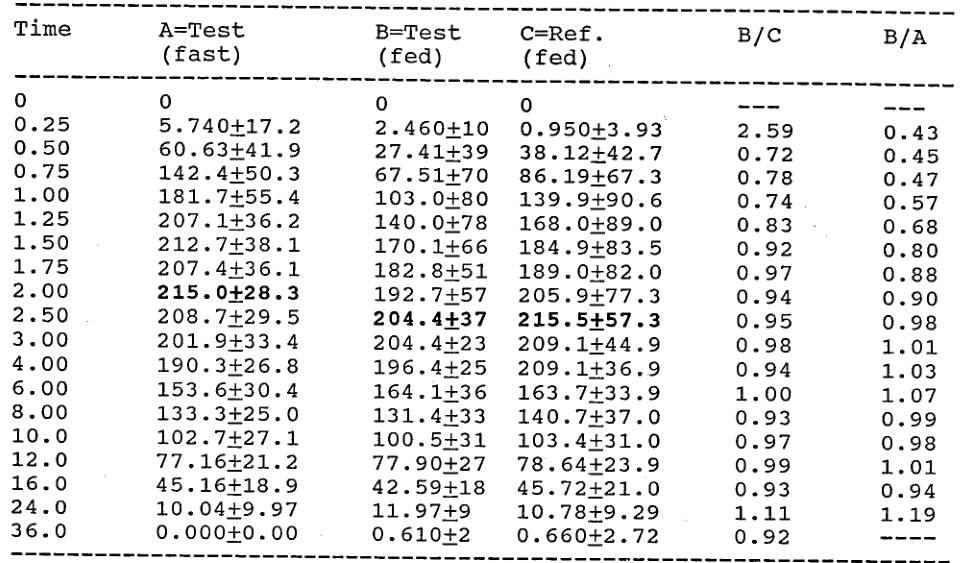

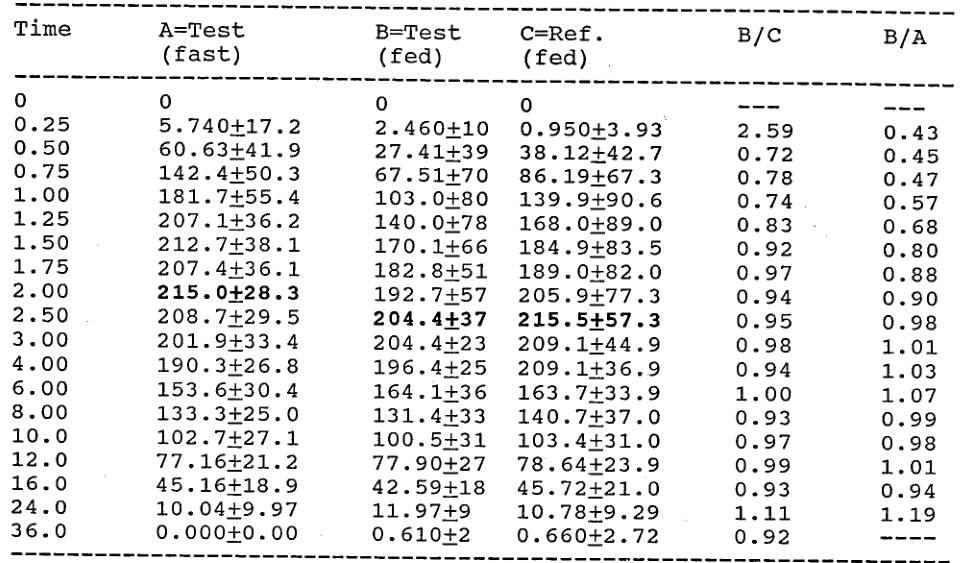

In [77]:
#check the output for one image , in here just add padding and crop the image
padding = 15
box=total_box[0]
image=Image.open(image_paths[0]).convert("RGB")
box = [box[0] - padding, box[1] - padding, box[2] + padding, box[3] + padding]

table_image = image.crop(box)
table_image

In [78]:
#import the library
import matplotlib.pyplot as plt
from transformers import DetrFeatureExtractor, DetrForObjectDetection

In [79]:
len(total_box)

10

10

In [80]:
# Define a list of colors to be used for bounding boxes
COLORS = [
    [0.000, 0.447, 0.741],
    [0.850, 0.325, 0.098],
    [0.929, 0.694, 0.125],
    [0.494, 0.184, 0.556],
    [0.466, 0.674, 0.188],
    [0.301, 0.745, 0.933],
]

# Function to plot bounding boxes on an image
def plot_simple_box(table_img, bboxes, file_name="output"):
    plt.figure(figsize=(16, 10))
    plt.imshow(table_img)
    ax = plt.gca()
    colors = COLORS * 100
    for bbox, c in zip(bboxes, colors):
        ax.add_patch(
            plt.Rectangle(
                (bbox[0], bbox[1]),
                bbox[2] - bbox[0],
                bbox[3] - bbox[1],
                fill=False,
                color=c,
                linewidth=0.5,
            )
        )
    plt.axis("off")
    plt.show()
    pic=plt.savefig(f"{file_name}.png", dpi=300,bbox_inches="tight")





In [81]:
#get the model
model_structure = TableTransformerForObjectDetection.from_pretrained(
    "microsoft/table-transformer-structure-recognition")


def get_row_col_bounds(table, ts_thresh=0.7, plot=False):
    feature_extractor = DetrFeatureExtractor()
    table_encoding = feature_extractor(table, return_tensors="pt")

    # predict table structure
    with torch.no_grad():
        outputs = model_structure(**table_encoding)

    # visualize table structure
    target_sizes = [table.size[::-1]]
    table_struct_results = feature_extractor.post_process_object_detection(
        outputs, threshold=ts_thresh, target_sizes=target_sizes
    )[0]


    row_boxes = table_struct_results["boxes"][
        table_struct_results["labels"] == model_structure.config.label2id["table row"]
    ]

    row_scores = table_struct_results["scores"][
        table_struct_results["labels"] == model_structure.config.label2id["table row"]
    ]

    col_boxes = table_struct_results["boxes"][
        table_struct_results["labels"]
        == model_structure.config.label2id["table column"]
    ]

    col_scores = table_struct_results["scores"][
        table_struct_results["labels"]
        == model_structure.config.label2id["table column"]
    ]

    table_header_box = table_struct_results["boxes"][
        table_struct_results["labels"]
        == model_structure.config.label2id["table column header"]
    ]
    table_header_score = table_struct_results["scores"][
        table_struct_results["labels"]
        == model_structure.config.label2id["table column header"]
    ]

    print(f"Num rows initially detected: {len(row_boxes)}")
    print(f"Num cols initially detected: {len(col_boxes)}")
    print(f"Num table header detected: {len(table_header_box)}")


    return (
        row_boxes,
        row_scores,
        col_boxes,
        col_scores,
        table_header_box,
        table_header_score,
    )

Some weights of the model checkpoint at microsoft/table-transformer-structure-recognition were not used when initializing TableTransformerForObjectDetection: ['model.backbone.conv_encoder.model.layer2.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer3.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer4.0.downsample.1.num_batches_tracked']
- This IS expected if you are initializing TableTransformerForObjectDetection from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TableTransformerForObjectDetection from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of the model checkpoint at microsoft/table-transformer-structure-recognition were not us

In [82]:
# Set the file path to the folder containing the images
file_path = '/content/drive/MyDrive/idp_bootcamp/week_3_assignment/Table detection_images'

# List all files in the directory
image_names_box = os.listdir(file_path)

In [83]:
image_names_box

['rec_0081e7fd154bb0319f96ac0c6127da1a-118.png',
 'rec_0005ab896e95c5de6885bbf595500a8e-66.png',
 'non_rec_00c0c202e8d3b133dae5f1e4a7137deb-42.png',
 'non_rec_0079611b26cefff735f1d98a932e8b7d-1.png',
 'rec_000f8315c3bea30fb7ae99f925286343-15.png',
 'rec_001e626d00966d0268d44ce686e8559b-118.png',
 'rec_005608f2ffa46e92e672f0083b6037c4-38.png',
 'rec_001e626d00966d0268d44ce686e8559b-62.png',
 'rec_00bb7f8f05c53d3e4e1ee3f332278707-177.png',
 'rec_004f4586092af34f31313224ab19c50c-4.png']

['rec_0081e7fd154bb0319f96ac0c6127da1a-118.png',
 'rec_0005ab896e95c5de6885bbf595500a8e-66.png',
 'non_rec_00c0c202e8d3b133dae5f1e4a7137deb-42.png',
 'non_rec_0079611b26cefff735f1d98a932e8b7d-1.png',
 'rec_000f8315c3bea30fb7ae99f925286343-15.png',
 'rec_001e626d00966d0268d44ce686e8559b-118.png',
 'rec_005608f2ffa46e92e672f0083b6037c4-38.png',
 'rec_001e626d00966d0268d44ce686e8559b-62.png',
 'rec_00bb7f8f05c53d3e4e1ee3f332278707-177.png',
 'rec_004f4586092af34f31313224ab19c50c-4.png']

In [84]:
#update the results of able_structure_outs is uploaded to list to store the values
total_table_structure_outs=[]
for i in range(0,len(image_paths)):
  padding = 15
  box=total_box[i]
  image=Image.open(image_paths[i]).convert("RGB")
  box = [box[0] - padding, box[1] - padding, box[2] + padding, box[3] + padding]
  print(box)
  table_image = image.crop(box)
  table_structure_outs = get_row_col_bounds(table_image)
  total_table_structure_outs.append(table_structure_outs)

/usr/local/lib/python3.10/dist-packages/transformers/models/detr/feature_extraction_detr.py:38: FutureWarning: The class DetrFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use DetrImageProcessor instead.
  warnings.warn(


[124.91999999999999, 192.43, 1087.27, 754.92]
Num rows initially detected: 19
Num cols initially detected: 8
Num table header detected: 1
[92.77, 1330.35, 1007.21, 1519.46]
Num rows initially detected: 2
Num cols initially detected: 5
Num table header detected: 1
[148.45, 364.17, 1086.13, 770.76]
Num rows initially detected: 10
Num cols initially detected: 7
Num table header detected: 1
[211.83, 411.03, 895.58, 961.87]
Num rows initially detected: 18
Num cols initially detected: 2
Num table header detected: 0
[169.53, 321.87, 983.37, 803.05]
Num rows initially detected: 13
Num cols initially detected: 12
Num table header detected: 1
[115.82, 117.9, 926.65, 336.48]
Num rows initially detected: 8
Num cols initially detected: 7
Num table header detected: 1
[115.82, 117.9, 926.65, 336.48]
Num rows initially detected: 1
Num cols initially detected: 1
Num table header detected: 0
[164.47, 159.8, 1098.51, 939.94]
Num rows initially detected: 22
Num cols initially detected: 3
Num table header 

In [85]:
total_table_structure_outs[9][0]

tensor([[ 19.1309,  21.2780, 483.7923,  38.5654],
        [ 19.5815,  38.0682, 483.2498,  56.5643]])

tensor([[ 19.1309,  21.2780, 483.7923,  38.5654],
        [ 19.5815,  38.0682, 483.2498,  56.5643]])

In [86]:
file_path = '/content/drive/MyDrive/idp_bootcamp/week_3_assignment/assingment_data'

# List all files in the directory
image_name1 = os.listdir(file_path)

In [87]:
save_path='/content/drive/MyDrive/idp_bootcamp/week_3_assignment/Table structure recognition_image/'+'structure_'+image_name1[0]
save_path

'/content/drive/MyDrive/idp_bootcamp/week_3_assignment/Table structure recognition_image/structure_0005ab896e95c5de6885bbf595500a8e-66.png'

'/content/drive/MyDrive/idp_bootcamp/week_3_assignment/Table structure recognition_image/structure_0005ab896e95c5de6885bbf595500a8e-66.png'

In [88]:
image_name1[0][0:-4]

'0005ab896e95c5de6885bbf595500a8e-66'

'0005ab896e95c5de6885bbf595500a8e-66'

In [89]:
#save the row structure recognized into folder
for i in range(len(image_paths)):
  padding = 15
  box=total_box[i]
  image=Image.open(image_paths[i]).convert("RGB")
  box = [box[0] - padding, box[1] - padding, box[2] + padding, box[3] + padding]
  print(box)
  table_image = image.crop(box)
  save_path='/content/drive/MyDrive/idp_bootcamp/week_3_assignment/Table structure recognition_image/'+'structure_'+image_name1[i]
  plot_simple_box(table_image, total_table_structure_outs[i][0])




Output hidden; open in https://colab.research.google.com to view.

In [90]:
from PIL import Image, ImageDraw

COLORS1 = [
    (0, 0, 255),      # Blue
    (255, 83, 25),    # Red
    (237, 176, 32),   # Yellow
    (126, 47, 142),   # Purple
    (119, 172, 48),   # Green
    (77, 190, 238),   # Light Blue
]

def plot_box(table_img, bboxes, width=3):
    """
    Draw bounding boxes on an image.

    :param table_img: The input image (PIL Image).
    :param bboxes: List of bounding boxes, each defined as (x1, y1, x2, y2).
    :param width: Width of the bounding box outlines.
    :return: Image with bounding boxes drawn.
    """
    # Create a drawable object
    draw = ImageDraw.Draw(table_img)

    # Draw each bounding box
    for bbox, color in zip(bboxes, COLORS1 * (len(bboxes) // len(COLORS1) + 1)):
        # Ensure the bbox is a tuple
        bbox = tuple(bbox)
        draw.rectangle(bbox, outline=color, width=width)

    return table_img



In [91]:
#add the padding to the image and crop the image and save that in to folder
for i in range(len(image_paths)):
  padding = 15
  box=total_box[i]
  image=Image.open(image_paths[i]).convert("RGB")
  box = [box[0] - padding, box[1] - padding, box[2] + padding, box[3] + padding]
  table_image = image.crop(box)
  save_path='/content/drive/MyDrive/idp_bootcamp/week_3_assignment/Table structure recognition_image/'+'structure_'+image_name1[i]
  output_img=plot_box(table_image, total_table_structure_outs[i][0])
  output_img.save(save_path)

## Decomposing cells


In [92]:
#use that to increase the padddinfg of image
from PIL import Image

def add_padding(image, padding_width, color=(255, 255, 255)):
  """Adds padding to a PIL image.

  Args:
    image: The PIL Image object.
    padding_width: The width of the padding in pixels.
    color: The color of the padding (default: white).

  Returns:
    A new PIL Image object with the padding added.
  """
  width, height = image.size
  new_width = width + 2 * padding_width
  new_height = height + 2 * padding_width
  new_image = Image.new(image.mode, (new_width, new_height), color)
  new_image.paste(image, (padding_width, padding_width))
  return new_image


# Example usage
# Assuming you have a PIL image named `table_image`


In [93]:
#sort the value of coordinates
def sort_row_col_boxes(row_boxes, col_boxes):
    row_boxes = row_boxes.tolist()
    col_boxes = col_boxes.tolist()
    row_boxes.sort(key=lambda x: x[1]) #[top_x, top_y, bottom_x, bottom_y]
    col_boxes.sort(key=lambda x: x[0])
    return row_boxes, col_boxes

In [94]:
#ordered the value
def get_cells_by_intersecting_rows_and_cols(row_boxes, col_boxes, padding=(0, 0)):
    cells = []
    for row_box in row_boxes:
        for col_box in col_boxes:
            cell_left_upper_x = col_box[0]
            cell_left_upper_y = row_box[1]
            cell_right_lower_x = col_box[2]
            cell_right_lower_y = row_box[3]
            cells.append(
                [
                    cell_left_upper_x,
                    cell_left_upper_y,
                    cell_right_lower_x,
                    cell_right_lower_y,
                ]
            )
    return cells


In [95]:
image_name1

['0005ab896e95c5de6885bbf595500a8e-66.png',
 '000f8315c3bea30fb7ae99f925286343-15.png',
 '001e626d00966d0268d44ce686e8559b-118.png',
 '001e626d00966d0268d44ce686e8559b-62.png',
 '0081e7fd154bb0319f96ac0c6127da1a-118.png',
 '005608f2ffa46e92e672f0083b6037c4-38.png',
 '0079611b26cefff735f1d98a932e8b7d-1.png',
 '004f4586092af34f31313224ab19c50c-4.png',
 '00c0c202e8d3b133dae5f1e4a7137deb-42.png',
 '00bb7f8f05c53d3e4e1ee3f332278707-177.png']

['0005ab896e95c5de6885bbf595500a8e-66.png',
 '000f8315c3bea30fb7ae99f925286343-15.png',
 '001e626d00966d0268d44ce686e8559b-118.png',
 '001e626d00966d0268d44ce686e8559b-62.png',
 '0081e7fd154bb0319f96ac0c6127da1a-118.png',
 '005608f2ffa46e92e672f0083b6037c4-38.png',
 '0079611b26cefff735f1d98a932e8b7d-1.png',
 '004f4586092af34f31313224ab19c50c-4.png',
 '00c0c202e8d3b133dae5f1e4a7137deb-42.png',
 '00bb7f8f05c53d3e4e1ee3f332278707-177.png']

overall_cells=[]
overall_sorted_rows=[]
overall_sorted_cols=[]
for i in range(len(image_paths)):
  padding = 15
  box=total_box[i]
  image=Image.open(image_paths[i]).convert("RGB")
  box = [box[0] - padding, box[1] - padding, box[2] + padding, box[3] + padding]
  table_image = image.crop(box)
  padded_image = add_padding(table_image, 20)
  padded_image.save('/content/drive/MyDrive/idp_bootcamp/week_3_assignment/padded_images/'+'padded_'+image_name1[i])
  table_structure_outs = get_row_col_bounds(padded_image)
  plot_simple_box(padded_image, table_structure_outs[0].tolist() + table_structure_outs[2].tolist())
  sorted_rows, sorted_cols = sort_row_col_boxes(table_structure_outs[0], table_structure_outs[2])
  cells = get_cells_by_intersecting_rows_and_cols(sorted_rows, sorted_cols)
  overall_cells.append(cells)
  overall_sorted_rows.append(sorted_rows)
  overall_sorted_cols.append(sorted_cols)

In [41]:

overall_cells = []  # List to store all detected cells for each image
overall_sorted_rows = []  # List to store sorted row boundaries for each image
overall_sorted_cols = []  # List to store sorted column boundaries for each image

for i in range(len(image_paths)):  # Loop through all image paths
    padding = 15  # Set padding for the bounding box
    box = total_box[i]  # Get the bounding box for the current image
    image = Image.open(image_paths[i]).convert("RGB")  # Open the image and convert it to RGB
    box = [box[0] - padding, box[1] - padding, box[2] + padding, box[3] + padding]  # Adjust the bounding box with padding
    table_image = image.crop(box)  # Crop the image to the adjusted bounding box
    padded_image = add_padding(table_image, 20)  # Add additional padding to the cropped image
    padded_image.save('/content/drive/MyDrive/idp_bootcamp/week_3_assignment/padded_images/' + 'padded_' + image_name1[i])  # Save the padded image

    table_structure_outs = get_row_col_bounds(padded_image)  # Get row and column boundaries from the table structure
    plot_simple_box(padded_image, table_structure_outs[0].tolist() + table_structure_outs[2].tolist())  # Plot the row and column boxes on the image
    sorted_rows, sorted_cols = sort_row_col_boxes(table_structure_outs[0], table_structure_outs[2])  # Sort the row and column boundaries
    cells = get_cells_by_intersecting_rows_and_cols(sorted_rows, sorted_cols)  # Get the cells by intersecting the sorted rows and columns

    overall_cells.append(cells)  # Append the detected cells to the overall list
    overall_sorted_rows.append(sorted_rows)  # Append the sorted row boundaries to the overall list
    overall_sorted_cols.append(sorted_cols)  # Append the sorted column boundaries to the overall list


Output hidden; open in https://colab.research.google.com to view.

## Cells to DataFrame

In [42]:
%pip install paddlepaddle paddleocr
%pip install opencv-python

In [43]:
from paddleocr import PaddleOCR

ocr = PaddleOCR(
    lang="en",
    use_gpu=False,
    show_log=False,
)

download https://paddleocr.bj.bcebos.com/PP-OCRv3/english/en_PP-OCRv3_det_infer.tar to /root/.paddleocr/whl/det/en/en_PP-OCRv3_det_infer/en_PP-OCRv3_det_infer.tar


100%|██████████| 4.00M/4.00M [00:17<00:00, 233kiB/s] 


download https://paddleocr.bj.bcebos.com/PP-OCRv4/english/en_PP-OCRv4_rec_infer.tar to /root/.paddleocr/whl/rec/en/en_PP-OCRv4_rec_infer/en_PP-OCRv4_rec_infer.tar


100%|██████████| 10.2M/10.2M [00:18<00:00, 563kiB/s] 


download https://paddleocr.bj.bcebos.com/dygraph_v2.0/ch/ch_ppocr_mobile_v2.0_cls_infer.tar to /root/.paddleocr/whl/cls/ch_ppocr_mobile_v2.0_cls_infer/ch_ppocr_mobile_v2.0_cls_infer.tar


100%|██████████| 2.19M/2.19M [00:14<00:00, 149kiB/s]


In [44]:
import cv2
import numpy as np

In [45]:
def PIL_to_cv(pil_img):
    return cv2.cvtColor(np.array(pil_img), cv2.COLOR_RGB2BGR)

In [46]:
file_path3 = '/content/drive/MyDrive/idp_bootcamp/week_3_assignment/padded_images'

# List all files in the directory
image_name_padded = os.listdir(file_path3)

In [47]:
image_name_padded

['padded_0005ab896e95c5de6885bbf595500a8e-66.png',
 'padded_000f8315c3bea30fb7ae99f925286343-15.png',
 'padded_001e626d00966d0268d44ce686e8559b-62.png',
 'padded_001e626d00966d0268d44ce686e8559b-118.png',
 'padded_0081e7fd154bb0319f96ac0c6127da1a-118.png',
 'padded_0079611b26cefff735f1d98a932e8b7d-1.png',
 'padded_005608f2ffa46e92e672f0083b6037c4-38.png',
 'padded_004f4586092af34f31313224ab19c50c-4.png',
 'padded_00c0c202e8d3b133dae5f1e4a7137deb-42.png',
 'padded_00bb7f8f05c53d3e4e1ee3f332278707-177.png']

In [48]:
file_path3+'/'+image_name_padded[0]

'/content/drive/MyDrive/idp_bootcamp/week_3_assignment/padded_images/padded_0005ab896e95c5de6885bbf595500a8e-66.png'

In [49]:
over_results = []  # List to store OCR results for all images

for i in range(len(image_name_padded)):  # Loop through all padded image names
    results = []  # List to store OCR results for the current image
    cells = overall_cells[i]  # Get the list of cell bounding boxes for the current image

    for cell in cells:  # Loop through each cell in the current image
        path_pad = file_path3 + '/' + image_name_padded[i]  # Construct the file path for the padded image
        padded_image = Image.open(path_pad).convert("RGB")  # Open the padded image and convert it to RGB
        cell_image = padded_image.crop(cell)  # Crop the image to the current cell's bounding box
        result = ocr.ocr(PIL_to_cv(cell_image))  # Perform OCR on the cropped cell image
        results.append(result)  # Append the OCR result for the current cell to the results list

    over_results.append(results)  # Append the results for the current image to the overall results list


[2024/10/16 03:46:58] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2024/10/16 03:46:58] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2024/10/16 03:46:58] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2024/10/16 03:46:59] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2024/10/16 03:46:59] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2024/10/16 03:46:59] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2024/10/16 03:46:59] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2024/10/16 03:46:59] ppocr WARNING: Since the angle classifier is not initialized,

In [50]:
i

9

In [51]:
import pandas as pd  # Ensure pandas is imported

def input_df(index):
    num_rows = len(overall_sorted_rows[index])
    num_cols = len(overall_sorted_cols[index])

    df = pd.DataFrame(index=range(num_rows), columns=range(num_cols))
    for i, result in enumerate(over_results[index]):
      if result[0] is not None and result[0][0] is not None and result[0][0][1] is not None and result[0][0][1][0] is not None:
        # Ensure the result has the required structure before accessing
          if len(result) > 0 and len(result[0]) > 0 and len(result[0][0]) > 1:
              df.iloc[i // num_cols, i % num_cols] = result[0][0][1][0]

    return df


In [52]:
#check the names are correct
for i in range(len(image_name1)):
  print(image_name1[i][0:-4]==image_name_padded[i][7:-4])

True
True
False
False
True
False
False
True
True
True


In [53]:
image_name_padded[1][7:-4]

'000f8315c3bea30fb7ae99f925286343-15'

In [54]:
#check the name
check_name="/content/drive/MyDrive/idp_bootcamp/week_3_assignment/csv_outs/"+image_name1[i][0:-4]+".csv"
check_name

'/content/drive/MyDrive/idp_bootcamp/week_3_assignment/csv_outs/00bb7f8f05c53d3e4e1ee3f332278707-177.csv'

In [55]:
import os

# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Define the output directory
output_dir = "/content/drive/MyDrive/idp_bootcamp/week_3_assignment/csv_outs"

# Create the directory if it does not exist
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Loop through your results and save DataFrames as CSV
for i in range(len(over_results)):
    print(i)
    df = input_df(i)  # Get the DataFrame for the current index
    output_file = f"{output_dir}/{image_name1[i][:-4]}.csv"  # Use the defined output directory
    df.to_csv(output_file, index=False)  # Save the DataFrame to a CSV file without the index


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
0
1
2
3
4
5
6
7
8
9
